<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


C:\Users\brije\AppData\Local\Temp\ipykernel_18956\871374683.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['ConvertedComp'], shade=False)


<Axes: xlabel='ConvertedComp', ylabel='Density'>

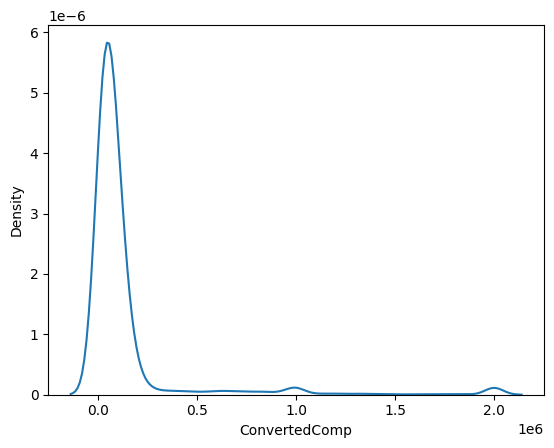

In [3]:
# your code goes here
sns.kdeplot(df['ConvertedComp'], shade=False)

Plot the histogram for the column `ConvertedComp`.


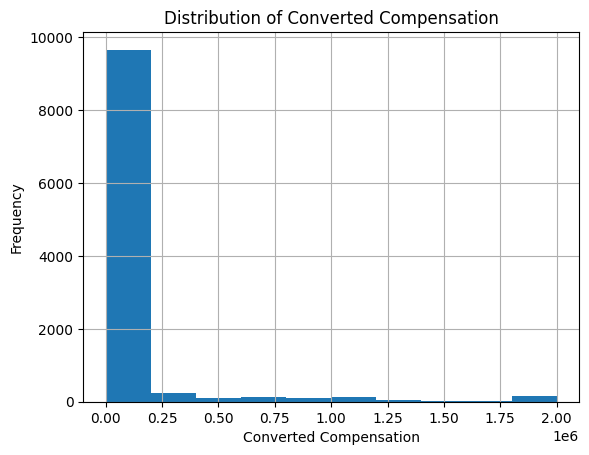

In [5]:
# your code goes here
df["ConvertedComp"].hist()
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.show()

What is the median of the column `ConvertedComp`?


In [42]:
# your code goes here
df["ConvertedComp"].median()

57745.0

How many responders identified themselves only as a **Man**?


In [11]:
# your code goes here
df["Gender"].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [12]:
# your code goes here
df_w=df[df["Gender"]=="Woman"]
df_w["ConvertedComp"].median()


57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [13]:
# your code goes here
df["Age"].describe()[['min', '25%', '50%', '75%', 'max']]

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


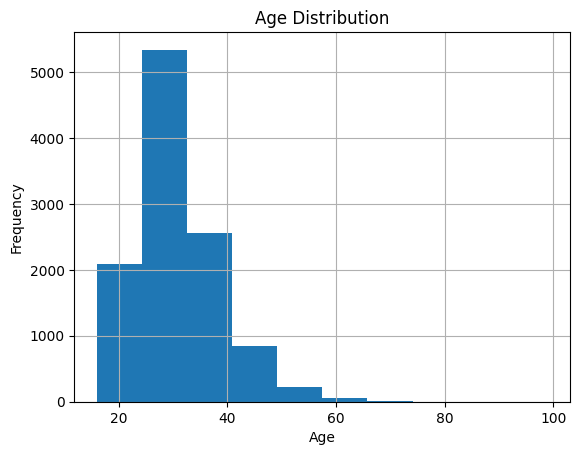

In [17]:
# your code goes here
df_a=df["Age"].dropna()
df_a.hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<Axes: ylabel='ConvertedComp'>

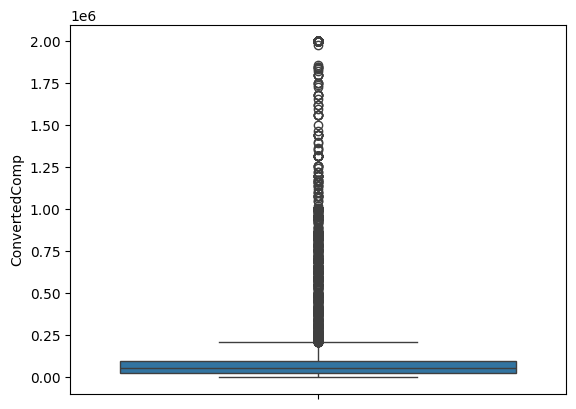

In [18]:
# your code goes here
sns.boxplot(df["ConvertedComp"])


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [19]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
IQR

73132.0

Find out the upper and lower bounds.


In [20]:
# your code goes here
ma = df['ConvertedComp'].max()
mi = df['ConvertedComp'].min()
print (ma)
print (mi)

2000000.0
0.0


Identify how many outliers are there in the `ConvertedComp` column.


In [21]:
# your code goes here
((df['ConvertedComp'] < (Q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (Q3 + 1.5 * IQR))).sum()


879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [24]:
# your code goes here
df_new = df[(df['ConvertedComp'] < (Q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (Q3 + 1.5 * IQR))]
df_new


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
13,32,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,Associate degree,"Information systems, information technology, o...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Indu...,21.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
45,100,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,Canada,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,39.0,Woman,No,Bisexual,White or of European descent,No,Appropriate in length,Easy
46,102,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,37.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
60,128,"I am not primarily a developer, but I write co...",Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United Kingdom,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,30.0,Man,No,Bisexual,White or of European descent,Yes,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11296,24915,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Another engineering discipline (ex. civil, ele...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,27.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Neither easy nor difficult
11303,24931,I am a developer by profession,No,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Switzerland,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat less welcome now than last year,Tech articles written by other developers;Indu...,45.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
11350,25036,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","A business discipline (ex. accounting, finance...",...,Just as welcome now as I felt last year,NaN,48.0,Man,No,Straight / Heterosexual,White or of European descent,No,Too long,Neither easy nor difficult
11353,25047,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,39.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropria

In [46]:
df_new['ConvertedComp'].median()

816492.0

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [40]:
# your code goes here
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Extract the correlations with the 'Age' column
age_correlations = correlation_matrix["Age"]

# Display the correlations
print(age_correlations)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).



Question 1
What is the median ConvertedComp before removing outliers?

In [47]:
# Calculate Q1 and Q3
Q1 = df["ConvertedComp"].quantile(0.25)
Q3 = df["ConvertedComp"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame without the outliers
df_no_outliers = df[(df["ConvertedComp"] >= lower_bound) & (df["ConvertedComp"] <= upper_bound)]

# Calculate the median of ConvertedComp after removing outliers
median_converted_comp_no_outliers = df_no_outliers["ConvertedComp"].median()

# Display the median
median_converted_comp_no_outliers


52704.0


Question 2
What is the median ConvertedComp after removing outliers?

In [48]:
median_converted_comp_before = df["ConvertedComp"].median()
print(median_converted_comp_before)


57745.0


Based on the boxplot of ‘Age’ how many outliers do you see below Q1?

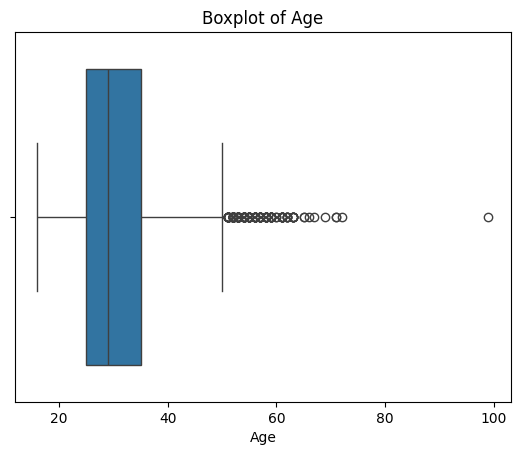

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()


In [50]:
Q1_age = df["Age"].quantile(0.25)
# Define bounds for outliers in Age
lower_bound_age = Q1_age - 1.5 * (df["Age"].quantile(0.75) - Q1_age)

# Count outliers below Q1
outliers_below_Q1 = df[df["Age"] < lower_bound_age]
num_outliers_below_Q1 = outliers_below_Q1.shape[0]
print(num_outliers_below_Q1)


0



Question 4
What is the mean ConvertedComp after removing outliers?

In [51]:
mean_converted_comp_after = df_no_outliers["ConvertedComp"].mean()
print(mean_converted_comp_after)

59883.20838915799
